In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [115]:

        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholestoral in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flourosopy
        thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



SyntaxError: invalid syntax (2760733689.py, line 3)

In [ ]:
df =  pd.read_csv('Arquivoskaggle/heart.csv', sep = ',')
df

In [ ]:
df.info()

In [ ]:
#verificar se há valores nulos no data set 
df.isnull().sum()

In [ ]:
#verifiar se há linhas duplicadas 
df.duplicated()

In [ ]:
#para verificar quantas linhas estão duplicadas
df.duplicated().sum()
#sim, há linhas duplicadas, 723 linhas

In [ ]:
#criar um data frame novo sem as duplicadas 
hd = df.drop_duplicates()
hd

In [ ]:
hd.describe()
#chol (colesterol) é possivel verificar  que 75% dos dados estão com valores proximos de 274.750, no entanto há valores pra maximo de 564.000. Neste caso, precisara tratar mais pra frente.

In [ ]:

plt.figure(figsize= (16,10))
sns.heatmap(hd.corr(), annot = True, cmap = "Blues")
#verificar a correção dos dados com a Target(alvo). As colunas que tem maior correlação com ela. Neste caso das cores,
#que estão mais azul escuro.

In [ ]:
hd.head(2)

In [ ]:
hd.columns

In [ ]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

In [ ]:
#separar as variaveis categoricas, ou seja, aquelas que seguem um padrão de numeração para as que não seguem (na descrição do teste informa se é categorica)
categoricas = ['sex','cp','fbs','restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)
        
#a função mostra se uma das categorias esiver dentro das categoricas, mostrar um tipo de grafico, se estiver em outra, mostrar em outro tipo de grafico.

#nas variaveis categoricas da pra ver em que casos  o target(alvo) esta influenciando nas outras variaveis.
#para as variaveis numericas da pra ver os casos em que os outliers estão influenciando nos dados também.

In [ ]:
# Removendo Outliers

In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot (data = hd)

#outra maneira de verificar os outliers nas variaveis do dataset

In [ ]:
hd.describe()

In [ ]:
hd['trestbps'].quantile(0.99)
#Aqui, neste caso, a ideia foi verificar qual seria o maximo se retirasse  somente 1% dos dados

In [ ]:
hd1 = hd[hd["trestbps"]< hd['trestbps'].quantile(0.99)]


In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot (data = hd1)

#verificar se foi retirado o outlier da variavel

In [ ]:
hd1.describe()

#é possivel verificar que o valor maximo para "trestbps" é de 178 pq provavelmente nao existe o valor 180 no dataset

In [ ]:
#TRATANDO O OUTLIERS DE CHOL (COLESTEROL). SEGUE A MESMA IDEIA QUE O TRATAMENTO ANTERIOR
hd['chol'].quantile(0.98)
#Aqui, neste caso, a ideia foi verificar qual seria o maximo se retirasse  somente 1% dos dados

In [ ]:
hd2 = hd1[hd1["chol"]< hd1['chol'].quantile(0.98)]

In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot (data = hd2)

#verificar se foi retirado o outlier da variavel

In [ ]:
hd2['thalach'].quantile(0.005)

In [ ]:
hd3 = hd2[hd2['thalach']> hd2['thalach'].quantile(0.005)]

In [120]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

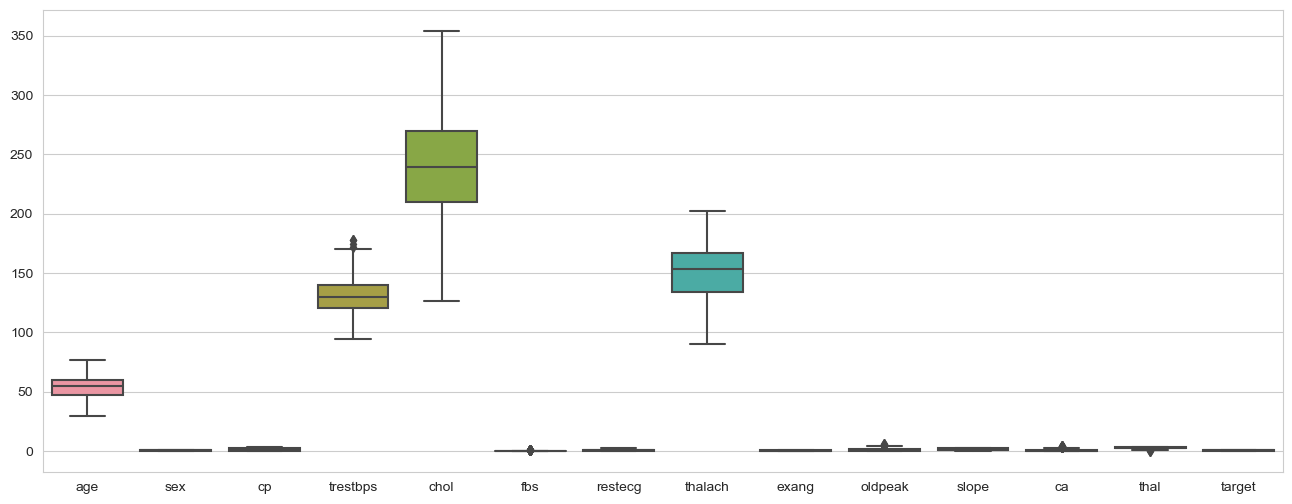

In [121]:
plt.figure(figsize = (16,6))
sns.boxplot (data = hd3)

In [122]:
categoricas = ['sex','cp','fbs','restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [123]:
hd3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [134]:
hd4 = pd.get_dummies(hd3, columns = ['sex','cp','fbs','restecg', 'exang', 'slope', 'ca', 'thal'])
hd4

#transformou as colunas categoricas em 0 e 1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
#primeiro sera rodado o dataset junto com os dummies.

In [135]:
hd4['chol'].max(), hd4['chol'].min()

#o valor maximo e minimo de colesterol

(354, 126)

In [136]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [137]:
#deixar todas as colunas e tirar somente a coluna alvo "target"
X = hd4.drop ('target', axis = 1 )
#somente a coluna de 'target', ou seja, se possui ou nao a possibilidade de ter a doença
y = hd4['target']



In [138]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [139]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 289, dtype: int64

In [140]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#separar o dataset em treino e teste

In [141]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
74,48,130,256,150,0.0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
71,61,140,207,138,1.9,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
94,62,128,208,140,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
26,44,130,233,179,0.4,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
80,50,140,233,163,0.6,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
129,57,140,192,148,0.4,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
599,63,140,195,179,0.0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [142]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
50,58,150,283,162,1.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
220,57,130,236,174,0.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
628,69,140,239,151,1.8,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
47,66,178,228,165,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
271,44,120,263,173,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
9,54,122,286,116,3.2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
51,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
252,55,132,353,132,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
90,54,108,267,167,0.0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
300,46,105,204,172,0.0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [154]:
#utilizando o modelo logistic regression

log = LogisticRegression(max_iter=2000)

In [156]:
log.fit(X_train, y_train)

#treinando o modelo

LogisticRegression(max_iter=2000)

In [157]:
#verificando a acuracia  quando ele analisa os dados de treino com as repostas

In [159]:
log.score(X_train, y_train)

0.8744588744588745

In [162]:
log.score(X_test,y_test)

#espera-se que o teste seja menor que o de treino

0.8448275862068966

In [164]:
# outra forma de verificar a acuracia é utilizando o predict
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [166]:
accuracy_score(y_test, y_previsto)

#passando a resposta oficial que é o que foi usado no y_test
#tanto o log.score como o accuracy_score mostram a acuracia do teste.

0.8448275862068966

In [167]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [168]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

In [185]:
#criar uma função que faz a mesma coisa que os teste feito anteriormente com o LogisticRegression para ser utilizado 
#em outros modelos de treinamento 

def relatorio_ml(df,algoritmo, opt = 2):
    X= df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    
    if opt == 0:
        ml = algoritmo (max_iter = 2000)
    elif opt ==1:
        ml = algoritmo (n_estimators = 2000)
    elif opt ==2:
        ml = algoritmo()
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    
    score_test = ml.score(X_test, y_test)
    print(f"Acuracia teste: {score_test * 100:.2f}%")
          
    y_previsto = log.predict(X_test)
    print("-----CLASSIFICATION REPORT------")
    print(classification_report(y_test, y_previsto))
          
    print("-----CONFUSION MATRIX------")
    confusao = (confusion_matrix(y_test, y_previsto))
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
          
    return score_train, score_test

Acurácia treino: 87.45%
Acuracia teste: 84.48%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

-----CONFUSION MATRIX------


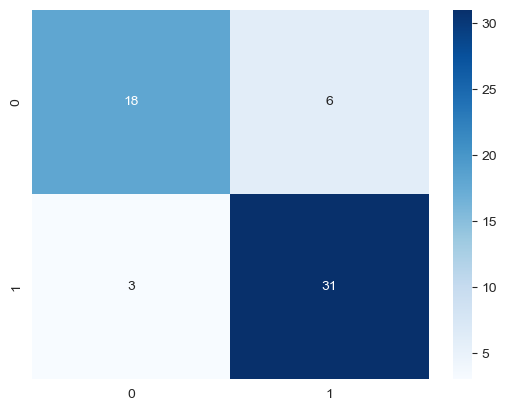

In [186]:
#testando com o modelo  LogisticRegression

log_train, log_test = relatorio_ml (hd4, LogisticRegression, opt =0)

Acurácia treino: 100.00%
Acuracia teste: 74.14%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

-----CONFUSION MATRIX------


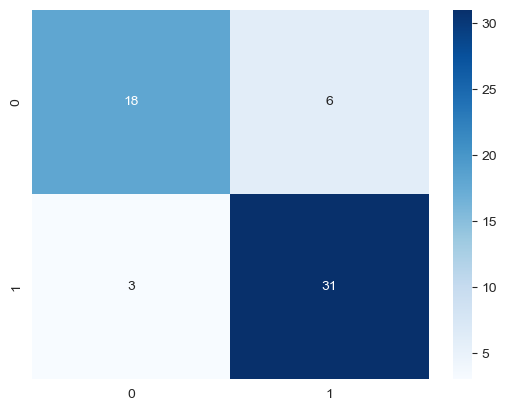

In [187]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

#Neste modelo é possivel perceber que no teste a acuracia foi menor que o anterior.

Acurácia treino: 93.51%
Acuracia teste: 82.76%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

-----CONFUSION MATRIX------


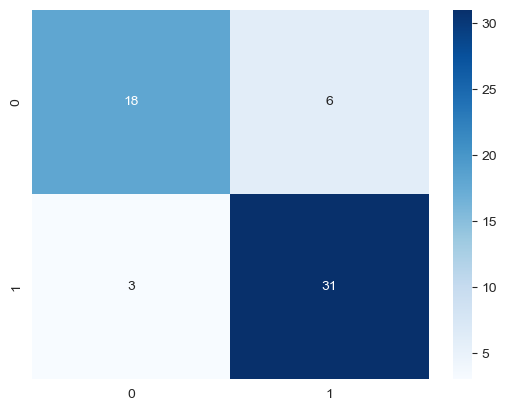

In [189]:
ada_train, ada_test = relatorio_ml(hd4,AdaBoostClassifier)

#melhor que o anterior, mas não melhor do que o de Logistic

C:\Users\Elaine\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Elaine\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Acurácia treino: 77.06%
Acuracia teste: 60.34%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

-----CONFUSION MATRIX------


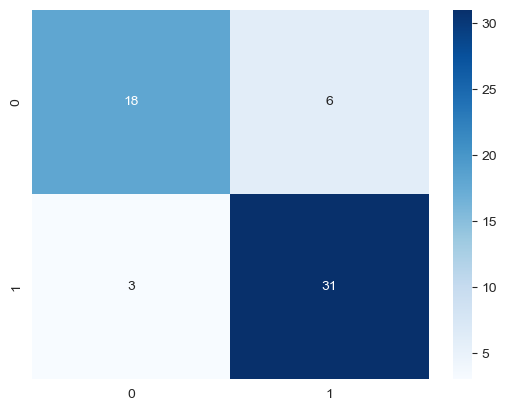

In [191]:
kn_train, kn_teste =  relatorio_ml (hd4, KNeighborsClassifier)

#Não performou bem 

Acurácia treino: 100.00%
Acuracia teste: 81.03%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

-----CONFUSION MATRIX------


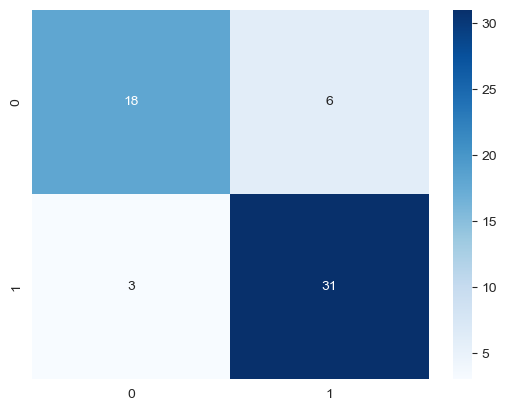

In [193]:
rand_train, rand_test = relatorio_ml (hd4, RandomForestClassifier)

In [200]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acurácia Treino': [round(log_train * 100,2), round(tree_train *100, 2), round(kn_train * 100,2),
                           round(rand_train *100,2), round(ada_train*100,2)],
        'Acurácia Teste': [round(log_test * 100,2), round(tree_test *100,2), round(kn_teste *100,2),
                           round(rand_test *100,2), round (ada_test *100,2)],
                                 
       }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df

#Verificar a acuracia de cada modelo por ordem de melhor acuracia

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest Classifier,100.00,81.03
1,Decision Tree,100.00,74.14
2,KNeighbors,77.06,60.34


In [203]:
#criar uma função utilizando o Scaler que faz a mesma coisa que os teste feito anteriormente com o LogisticRegression para ser utilizado 
#em outros modelos de treinamento 

def relatorio_ml_scaler(df,algoritmo, opt = 2):
    X= df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    
    
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train [cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
    
    if opt == 0:
        ml = algoritmo (max_iter = 2000)
    elif opt ==1:
        ml = algoritmo (n_estimators = 2000)
    elif opt ==2:
        ml = algoritmo()
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    
    score_test = ml.score(X_test, y_test)
    print(f"Acuracia teste: {score_test * 100:.2f}%")
          
    y_previsto = log.predict(X_test)
    print("-----CLASSIFICATION REPORT------")
    print(classification_report(y_test, y_previsto))
          
    print("-----CONFUSION MATRIX------")
    confusao = (confusion_matrix(y_test, y_previsto))
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
          
    return score_train, score_test, X_train

Acurácia treino: 87.45%
Acuracia teste: 84.48%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


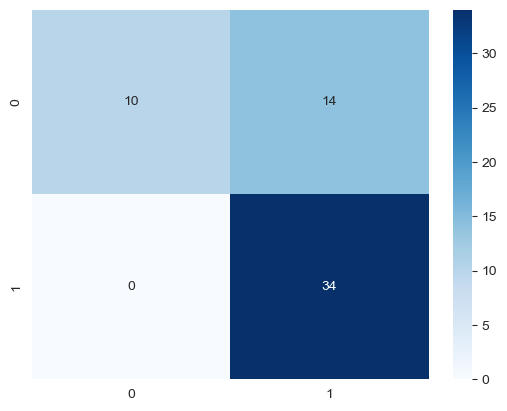

In [205]:
#testando com o modelo Scaler com  LogisticRegression

log_train_scaler, log_test_scaler, X_train = relatorio_ml_scaler (hd4, LogisticRegression, opt =0)

#É notavel que nao alterou muita coisa porque alguns algoritimos são mais sensiveis que outros

In [206]:
X_train

#Com o Standard Scaler os valores ficaram dessa forma. Transforma  as variaveis numericas em algo que os modelos conseguem entender
#melhor

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,0.037193,-1.284776,-0.749780,-1.848487,-0.901757,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
74,-0.623695,0.005025,0.330285,0.001907,-0.901757,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
71,0.808228,0.649926,-0.728179,-0.526777,0.741170,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
94,0.918376,-0.123955,-0.706578,-0.438663,-0.901757,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
26,-1.064287,0.005025,-0.166545,1.279561,-0.555878,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.138672,0.649926,1.561559,-0.747062,-0.728818,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
80,-0.403399,0.649926,-0.166545,0.574648,-0.382938,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
129,0.367637,0.649926,-1.052198,-0.086207,-0.555878,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
599,1.028524,0.649926,-0.987394,1.279561,-0.901757,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [209]:
#criar uma função utilizando o Scaler que faz a mesma coisa que os teste feito anteriormente com o LogisticRegression para ser utilizado 
#em outros modelos de treinamento 

def relatorio_ml_scaler(df,algoritmo, opt = 2):
    X= df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    
    
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train [cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])
    
    if opt == 0:
        ml = algoritmo (max_iter = 2000)
    elif opt ==1:
        ml = algoritmo (n_estimators = 2000)
    elif opt ==2:
        ml = algoritmo()
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    
    score_test = ml.score(X_test, y_test)
    print(f"Acuracia teste: {score_test * 100:.2f}%")
          
    y_previsto = log.predict(X_test)
    print("-----CLASSIFICATION REPORT------")
    print(classification_report(y_test, y_previsto))
          
    print("-----CONFUSION MATRIX------")
    confusao = (confusion_matrix(y_test, y_previsto))
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
          
    return score_train, score_test

Acurácia treino: 87.45%
Acuracia teste: 84.48%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


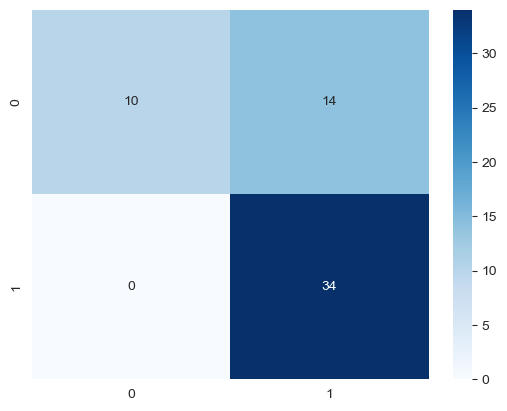

In [211]:
#testando com o modelo Scaler com  LogisticRegression

log_train_scaler, log_test_scaler= relatorio_ml_scaler (hd4, LogisticRegression, opt =0)

Acurácia treino: 100.00%
Acuracia teste: 74.14%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


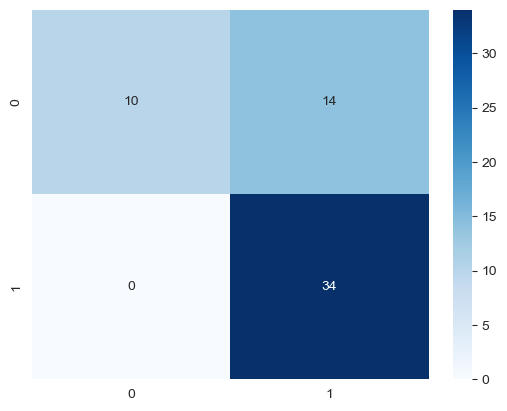

In [212]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(hd4, DecisionTreeClassifier)



Acurácia treino: 93.51%
Acuracia teste: 82.76%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


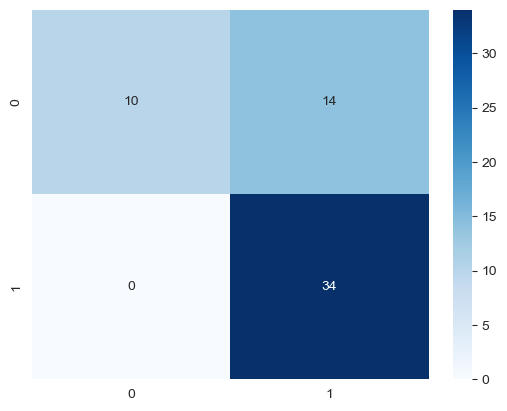

In [213]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(hd4,AdaBoostClassifier)

C:\Users\Elaine\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Elaine\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Acurácia treino: 87.45%
Acuracia teste: 79.31%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


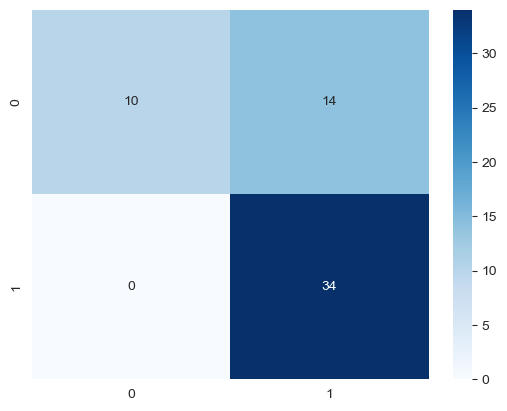

In [214]:
kn_train_scaler, kn_teste_scaler =  relatorio_ml_scaler (hd4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acuracia teste: 81.03%
-----CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

-----CONFUSION MATRIX------


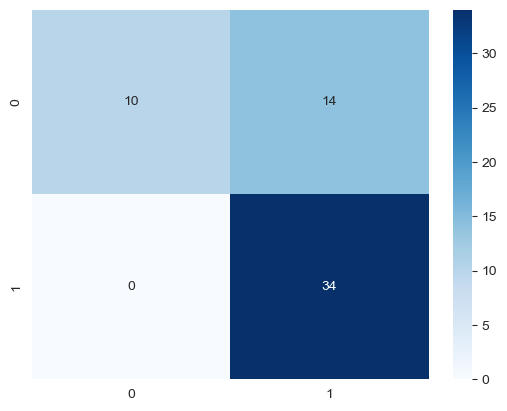

In [215]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler (hd4, RandomForestClassifier)

In [216]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acurácia Treino': [round(log_train * 100,2), round(tree_train *100, 2), round(kn_train * 100,2),
                           round(rand_train *100,2), round(ada_train*100,2)],
        'Acurácia Teste': [round(log_test * 100,2), round(tree_test *100,2), round(kn_teste *100,2),
                           round(rand_test *100,2), round (ada_test *100,2)],
                                 
       }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df

#Verificar a acuracia de cada modelo por ordem de melhor acuracia

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest Classifier,100.00,81.03
1,Decision Tree,100.00,74.14
2,KNeighbors,77.06,60.34


In [217]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acurácia Treino': [round(log_train_scaler * 100,2), round(tree_train_scaler *100, 2), round(kn_train_scaler * 100,2),
                           round(rand_train_scaler *100,2), round(ada_train_scaler *100,2)],
        'Acurácia Teste': [round(log_test_scaler * 100,2), round(tree_test_scaler *100,2), round(kn_teste_scaler *100,2),
                           round(rand_test_scaler *100,2), round (ada_test_scaler *100,2)],
                                 
       }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df

#Verificar a acuracia de cada modelo por ordem de melhor acuracia

#comparado com o anterior quando feito com o scaler, houve pouca variaação

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest Classifier,100.00,81.03
2,KNeighbors,87.45,79.31
1,Decision Tree,100.00,74.14
